# Pre-Processing

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import seaborn as sns
dataset = pd.read_csv("/content/dataset.csv")
df=dataset.copy()


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df

,stn_code,sampling_date,state,location,agency,type,so2,no2,rspm,spm,location_monitoring_station,pm2_5,date
0,150.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,NaN,02-01-1990
1,151.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,3.1,7.0,NaN,NaN,NaN,NaN,02-01-1990
2,152.0,February - M021990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,NaN,02-01-1990
3,150.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,NaN,03-01-1990
4,151.0,March - M031990,Andhra Pradesh,Hyderabad,NaN,Industrial Area,4.7,7.5,NaN,NaN,NaN,NaN,03-01-1990
...,...,...,...,...,...,...,...,...,...,...,...,...,...
253071,445.0,19-11-2015,Maharashtra,Dombivli,Maharashtra State Pollution Control Board,Industrial Area,20.0,54.0,102.0,NaN,"Ambernath Municipal Council Office, Ambernath",NaN,11/19/2015
253072,445.0,23-11-2015,Maharashtra,Dombivli,Maharashtra State Pollution Control Board,Industrial Area,19.0,59.0,110.0,NaN,"Ambernath Municipal Council Office, Ambernath",NaN,11/23/2015
253073,445.0,26-11-2015,Maharashtra,Dombivli,Maharashtra State Pollution Control Board,Industrial Area,19.0,60.0,113.0,NaN,"Ambernath Municipal Council Office, Ambernath",NaN,11/26/2015
253074,445.0,30-11-2015,Maharashtra,Dombivli,Maharashtra State Pollution Control Board,Industrial Area,20.0,59.0,112.0,NaN,"Ambernath Municipal Council Office, Ambernath",NaN,11/30/2015


In [ ]:
df.head()
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253076 entries, 0 to 253075
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     168112 non-null  object 
 1   sampling_date                253076 non-null  object 
 2   state                        253076 non-null  object 
 3   location                     253076 non-null  object 
 4   agency                       164865 non-null  object 
 5   type                         250119 non-null  object 
 6   so2                          230904 non-null  float64
 7   no2                          242356 non-null  float64
 8   rspm                         228519 non-null  float64
 9   spm                          117456 non-null  float64
 10  location_monitoring_station  236275 non-null  object 
 11  pm2_5                        5078 non-null    float64
 12  date                         253073 non-null  object 
dtyp

stn_code                        84964
sampling_date                       0
state                               0
location                            0
agency                          88211
type                             2957
so2                             22172
no2                             10720
rspm                            24557
spm                            135620
location_monitoring_station     16801
pm2_5                          247998
date                                3
dtype: int64

In [ ]:
df['agency'].value_counts()
# date format - mm/dd/yyyy
df['type'].value_counts()

Residential, Rural and other Areas    105031
Industrial Area                        52991
Residential and others                 52203
Industrial Areas                       29677
Sensitive Area                          6332
Sensitive Areas                         3084
RIRUO                                    473
Sensitive                                155
Industrial                                92
Residential                               81
Name: type, dtype: int64

In [ ]:
#deleting all values which have null in type attribute
df = df.dropna(axis = 0, subset = ['type'])
# deleting all values which are null in location attribute
df = df.dropna(axis = 0, subset = ['location'])
#deleting all null values in so2 attribute
df = df.dropna(axis = 0, subset = ['so2'])

df.isnull().sum()

stn_code                        68727
sampling_date                       0
state                               0
location                            0
agency                          71964
type                                0
so2                                 0
no2                              1376
rspm                            17841
spm                            129612
location_monitoring_station     13130
pm2_5                          223111
date                                3
dtype: int64

In [ ]:
#not interested in agency
del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']

In [ ]:
df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,02-01-1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,02-01-1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,02-01-1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,03-01-1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,03-01-1990


In [ ]:
a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['type'] = a
df['type'].value_counts()

Residential    144192
Industrial      74380
Other            9508
Name: type, dtype: int64

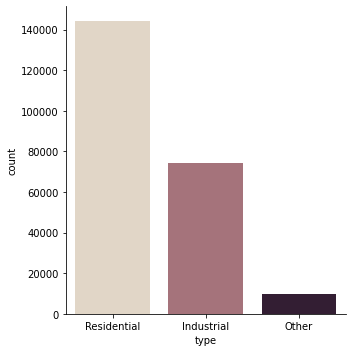

In [ ]:
sns.catplot(x = "type", kind = "count", palette = "ch: 0.25", data = df)

In [ ]:
# Creating an year column
df['date'] = pd.to_datetime(df['date'], format = '%m/%d/%Y',errors ='coerce')
df['year'] = df['date'].dt.year # year
df['year'] = df['year'].fillna(0.0).astype(int)
df = df[(df['year']>0)]

df.head()

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
1040,Andhra Pradesh,Hyderabad,Industrial,6.8,110.3,122.3,270.7,NaN,2004-01-16,2004
1041,Andhra Pradesh,Hyderabad,Industrial,6.9,134.1,101.7,235.0,NaN,2004-01-19,2004
1042,Andhra Pradesh,Hyderabad,Industrial,6.2,41.6,84.7,219.3,NaN,2004-01-23,2004
1043,Andhra Pradesh,Hyderabad,Industrial,6.3,45.7,93.7,222.3,NaN,2004-01-27,2004
1044,Andhra Pradesh,Hyderabad,Industrial,6.1,79.5,55.7,182.3,NaN,2004-01-30,2004


In [ ]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
1040,Andhra Pradesh,Hyderabad,Industrial,6.8,110.3,122.3,270.7,NaN,2004-01-16,2004
1041,Andhra Pradesh,Hyderabad,Industrial,6.9,134.1,101.7,235.0,NaN,2004-01-19,2004
1042,Andhra Pradesh,Hyderabad,Industrial,6.2,41.6,84.7,219.3,NaN,2004-01-23,2004
1043,Andhra Pradesh,Hyderabad,Industrial,6.3,45.7,93.7,222.3,NaN,2004-01-27,2004
1044,Andhra Pradesh,Hyderabad,Industrial,6.1,79.5,55.7,182.3,NaN,2004-01-30,2004
...,...,...,...,...,...,...,...,...,...,...
253070,Maharashtra,Dombivli,Industrial,18.0,54.0,110.0,NaN,NaN,2015-11-16,2015
253071,Maharashtra,Dombivli,Industrial,20.0,54.0,102.0,NaN,NaN,2015-11-19,2015
253072,Maharashtra,Dombivli,Industrial,19.0,59.0,110.0,NaN,NaN,2015-11-23,2015
253073,Maharashtra,Dombivli,Industrial,19.0,60.0,113.0,NaN,NaN,2015-11-26,2015


# 2004 Pollutant Wise Dataframe

In [ ]:
df_2004 = df[df.year == 2004]

In [ ]:
df_2004

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
1040,Andhra Pradesh,Hyderabad,Industrial,6.8,110.3,122.3,270.7,NaN,2004-01-16,2004
1041,Andhra Pradesh,Hyderabad,Industrial,6.9,134.1,101.7,235.0,NaN,2004-01-19,2004
1042,Andhra Pradesh,Hyderabad,Industrial,6.2,41.6,84.7,219.3,NaN,2004-01-23,2004
1043,Andhra Pradesh,Hyderabad,Industrial,6.3,45.7,93.7,222.3,NaN,2004-01-27,2004
1044,Andhra Pradesh,Hyderabad,Industrial,6.1,79.5,55.7,182.3,NaN,2004-01-30,2004
...,...,...,...,...,...,...,...,...,...,...
201826,Maharashtra,Nagpur,Residential,10.4,38.5,68.3,245.0,NaN,2004-12-16,2004
201827,Maharashtra,Nagpur,Residential,9.7,47.9,82.0,267.3,NaN,2004-12-20,2004
201828,Maharashtra,Nagpur,Residential,8.7,45.3,85.7,284.7,NaN,2004-12-22,2004
201829,Maharashtra,Nagpur,Residential,10.0,43.6,74.5,248.0,NaN,2004-12-27,2004


In [ ]:
df_2004_SO2 = df[df['so2'] >= 12.0][df['year'] == 2004]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df_2004_SO2

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
1452,Andhra Pradesh,Visakhapatnam,Industrial,12.0,23.0,95.0,154.0,NaN,2004-01-25,2004
1460,Andhra Pradesh,Visakhapatnam,Industrial,12.0,29.0,92.0,145.0,NaN,2004-02-19,2004
1471,Andhra Pradesh,Visakhapatnam,Industrial,12.0,31.0,98.0,150.0,NaN,2004-03-23,2004
1488,Andhra Pradesh,Visakhapatnam,Industrial,12.0,34.0,98.0,146.0,NaN,2004-05-13,2004
1499,Andhra Pradesh,Visakhapatnam,Industrial,12.0,33.0,77.0,126.0,NaN,2004-06-16,2004
...,...,...,...,...,...,...,...,...,...,...
201651,Maharashtra,Nagpur,Industrial,12.8,19.3,64.0,240.0,NaN,2004-03-16,2004
201654,Maharashtra,Nagpur,Industrial,12.6,20.1,44.7,202.7,NaN,2004-03-26,2004
201695,Maharashtra,Nagpur,Industrial,15.2,31.0,24.5,125.5,NaN,2004-08-25,2004
201767,Maharashtra,Nagpur,Residential,12.0,23.6,40.0,167.0,NaN,2004-05-18,2004


# SO2 Max 2016

In [ ]:
df_2004_SO2[['state','location','year','so2']]



,state,location,year,so2
1452,Andhra Pradesh,Visakhapatnam,2004,12.0
1460,Andhra Pradesh,Visakhapatnam,2004,12.0
1471,Andhra Pradesh,Visakhapatnam,2004,12.0
1488,Andhra Pradesh,Visakhapatnam,2004,12.0
1499,Andhra Pradesh,Visakhapatnam,2004,12.0
...,...,...,...,...
201651,Maharashtra,Nagpur,2004,12.8
201654,Maharashtra,Nagpur,2004,12.6
201695,Maharashtra,Nagpur,2004,15.2
201767,Maharashtra,Nagpur,2004,12.0


# NO2 Max 2004

In [ ]:
df_2004_NO2 = df[df['no2'] >= 50.0][df['year'] == 2004]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df_2004_NO2

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
1040,Andhra Pradesh,Hyderabad,Industrial,6.8,110.3,122.3,270.7,NaN,2004-01-16,2004
1041,Andhra Pradesh,Hyderabad,Industrial,6.9,134.1,101.7,235.0,NaN,2004-01-19,2004
1044,Andhra Pradesh,Hyderabad,Industrial,6.1,79.5,55.7,182.3,NaN,2004-01-30,2004
1048,Andhra Pradesh,Hyderabad,Industrial,5.0,80.1,144.7,305.3,NaN,2004-02-13,2004
1049,Andhra Pradesh,Hyderabad,Industrial,11.4,80.8,153.0,289.3,NaN,2004-02-16,2004
...,...,...,...,...,...,...,...,...,...,...
201626,Maharashtra,Nagpur,Residential,9.7,59.9,77.3,262.0,NaN,2004-12-21,2004
201627,Maharashtra,Nagpur,Residential,9.5,51.2,60.7,212.0,NaN,2004-12-23,2004
201628,Maharashtra,Nagpur,Residential,10.0,61.9,87.0,280.3,NaN,2004-12-28,2004
201726,Maharashtra,Nagpur,Industrial,10.6,51.4,76.0,255.7,NaN,2004-12-18,2004


In [ ]:
df_2004_NO2[['state','location','year','no2']]


,state,location,year,no2
1040,Andhra Pradesh,Hyderabad,2004,110.3
1041,Andhra Pradesh,Hyderabad,2004,134.1
1044,Andhra Pradesh,Hyderabad,2004,79.5
1048,Andhra Pradesh,Hyderabad,2004,80.1
1049,Andhra Pradesh,Hyderabad,2004,80.8
...,...,...,...,...
201626,Maharashtra,Nagpur,2004,59.9
201627,Maharashtra,Nagpur,2004,51.2
201628,Maharashtra,Nagpur,2004,61.9
201726,Maharashtra,Nagpur,2004,51.4


# spm values 2004

In [ ]:
df_2004_spm = df[df['spm'] >= 650][df['year'] == 2004]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [ ]:
df_2004_spm

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year
48567,Chandigarh,Chandigarh,Residential,11.0,12.00,678.0,1752.0,NaN,2004-05-20,2004
74734,Goa,Vasco,Industrial,2.0,14.10,142.0,736.0,NaN,2004-11-18,2004
106336,Himachal Pradesh,Paonta Sahib,Residential,0.0,8.00,NaN,901.0,NaN,2004-03-19,2004
106347,Himachal Pradesh,Paonta Sahib,Residential,1.0,8.00,NaN,739.0,NaN,2004-04-19,2004
106359,Himachal Pradesh,Paonta Sahib,Residential,1.0,9.00,NaN,666.0,NaN,2004-05-21,2004
106491,Himachal Pradesh,Paonta Sahib,Industrial,2.0,7.00,NaN,808.0,NaN,2004-04-17,2004
106503,Himachal Pradesh,Paonta Sahib,Industrial,2.0,7.00,NaN,1055.0,NaN,2004-05-20,2004
106504,Himachal Pradesh,Paonta Sahib,Industrial,2.0,7.00,NaN,744.0,NaN,2004-05-22,2004
106518,Himachal Pradesh,Paonta Sahib,Industrial,2.0,7.00,NaN,756.0,NaN,2004-06-26,2004
106519,Himachal Pradesh,Paonta Sahib,Industrial,2.0,6.00,NaN,972.0,NaN,2004-06-29,2004


In [ ]:
df_2004_spm[['state','location','year','spm']]

,state,location,year,spm
48567,Chandigarh,Chandigarh,2004,1752.0
74734,Goa,Vasco,2004,736.0
106336,Himachal Pradesh,Paonta Sahib,2004,901.0
106347,Himachal Pradesh,Paonta Sahib,2004,739.0
106359,Himachal Pradesh,Paonta Sahib,2004,666.0
106491,Himachal Pradesh,Paonta Sahib,2004,808.0
106503,Himachal Pradesh,Paonta Sahib,2004,1055.0
106504,Himachal Pradesh,Paonta Sahib,2004,744.0
106518,Himachal Pradesh,Paonta Sahib,2004,756.0
106519,Himachal Pradesh,Paonta Sahib,2004,972.0


Analysis

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['year'].value_counts()

2013    16265
2014    14856
2012    13702
2015    13665
2011    12911
2010    11987
2007     9744
2008     9470
2009     9112
2006     7956
2005     5278
2004     4823
2003      865
1987       13
1988        7
Name: year, dtype: int64

Histogram Of SO2

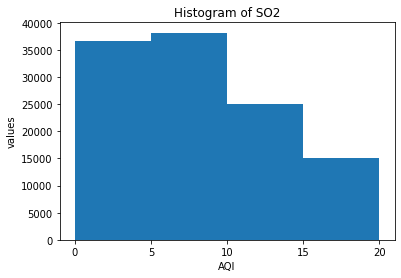

In [ ]:

from matplotlib import pyplot as plt
import numpy as np
fig,ax =plt.subplots(1,1)

ax.hist(df['so2'],bins=[0,5,10,15,20])
ax.set_title("Histogram of SO2")
ax.set_xticks([0,5,10,15,20])
ax.set_xlabel("AQI")
ax.set_ylabel("values")
plt.show()

Histogram of NO2

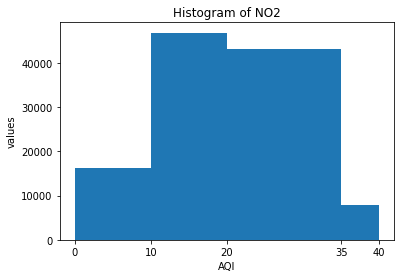

In [ ]:
# Histogram for NO2
from matplotlib import pyplot as plt
import numpy as np
fig,ax =plt.subplots(1,1)

ax.hist(df['no2'],bins=[0,10,20,35,40])
ax.set_title("Histogram of NO2")
ax.set_xticks([0,10,20,35,40])
ax.set_xlabel("AQI")
ax.set_ylabel("values")
plt.show()

Histogram of spm

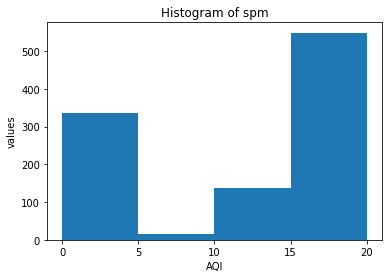

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
fig,ax =plt.subplots(1,1)

ax.hist(df['spm'],bins=[0,5,10,15,20])
ax.set_title("Histogram of spm")
ax.set_xticks([0,5,10,15,20])
ax.set_xlabel("AQI")
ax.set_ylabel("values")
plt.show()

In [ ]:
df.corr()

,so2,no2,rspm,spm,pm2_5,year
so2,1.000000,0.483444,0.203331,0.154805,-0.125487,-0.142347
no2,0.483444,1.000000,0.410398,0.438665,0.584193,-0.113497
rspm,0.203331,0.410398,1.000000,0.783292,0.721309,-0.059590
spm,0.154805,0.438665,0.783292,1.000000,NaN,-0.120115
pm2_5,-0.125487,0.584193,0.721309,NaN,1.000000,0.067683
year,-0.142347,-0.113497,-0.059590,-0.120115,0.067683,1.000000


In [ ]:
df.corr(method='kendall')

,so2,no2,rspm,spm,pm2_5,year
so2,1.000000,0.440067,0.210400,0.139891,0.178805,-0.134850
no2,0.440067,1.000000,0.298265,0.306014,0.475476,-0.126261
rspm,0.210400,0.298265,1.000000,0.609421,0.618253,-0.052218
spm,0.139891,0.306014,0.609421,1.000000,NaN,-0.090375
pm2_5,0.178805,0.475476,0.618253,NaN,1.000000,-0.070755
year,-0.134850,-0.126261,-0.052218,-0.090375,-0.070755,1.000000


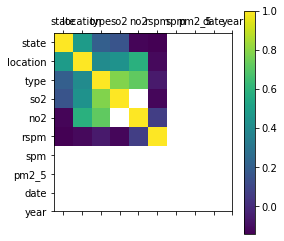

In [ ]:
plt.matshow(df.corr())
plt.xticks(range(len(df.columns)),df.columns)
plt.yticks(range(len(df.columns)),df.columns)
plt.colorbar()
plt.show()

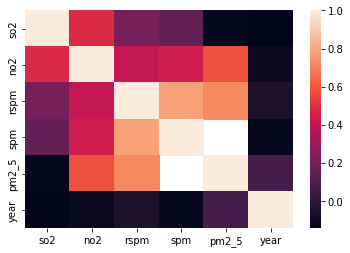

In [ ]:
sns.heatmap(df.corr(method='pearson'))
plt.show()
plt.savefig("heatmap_pearson.png")
plt.clf()
plt.close()

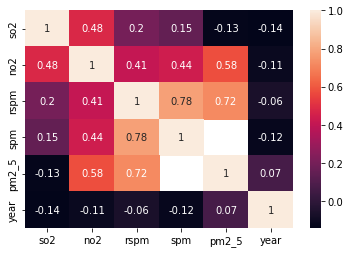

In [ ]:
correlation_matrix=df.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

Tuple Duplication

In [ ]:
df.shape

(130654, 10)

In [ ]:
df.duplicated(subset=None ,keep=False).value_counts()

False    129918
True        736
dtype: int64

In [ ]:
bool_series1=df.duplicated(subset=None ,keep="first")
df_census_unique1=df[~bool_series1]
print("Before removing duplicates:")
print(df.shape)
print("After removing duplicate tuples:")
print(df_census_unique1.shape)

Before removing duplicates:
(130654, 10)
After removing duplicate tuples:
(130286, 10)


In [ ]:
bool_series1=df.duplicated(subset=None ,keep=False)
df_census_unique1=df[~bool_series1]
print("Before removing duplicates:")
print(df.shape)
print("After removing duplicate tuples:")
print(df_census_unique1.shape)

Before removing duplicates:
(130654, 10)
After removing duplicate tuples:
(129918, 10)


In [ ]:
 print(df.memory_usage())

Index       5272344
state       1045232
location    1045232
type        1045232
so2         1045232
no2         1045232
rspm        1045232
spm         1045232
pm2_5       1045232
date        1045232
year        1045232
dtype: int64


In [ ]:
df.loc[0:5]

,state,location,type,so2,no2,rspm,spm,pm2_5,date,year


In [ ]:
df.iloc[-2]

state               Maharashtra
location               Dombivli
type                 Industrial
so2                        19.0
no2                        60.0
rspm                      113.0
spm                         NaN
pm2_5                       NaN
date        2015-11-26 00:00:00
year                       2015
Name: 253073, dtype: object

In [ ]:
df.isnull().values.any()

True

In [ ]:
print(df.shape)

(130654, 10)


In [ ]:
df.duplicated(subset=None ,keep=False).value_counts()

False    129918
True        736
dtype: int64

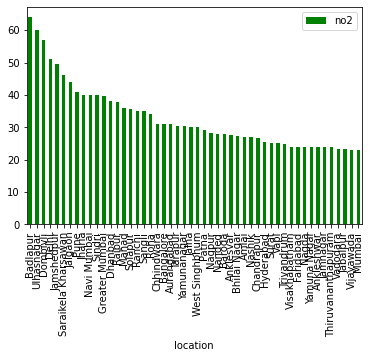

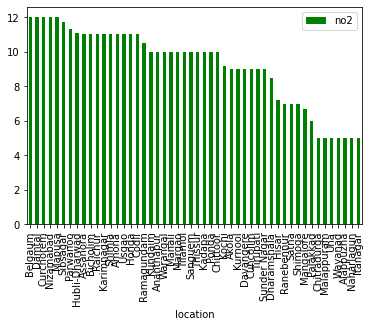

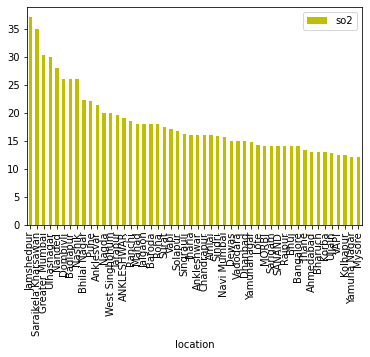

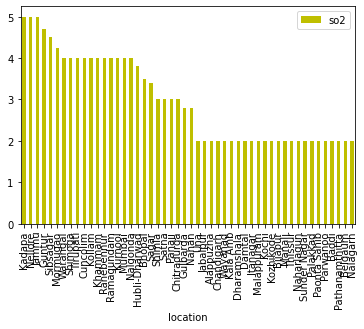

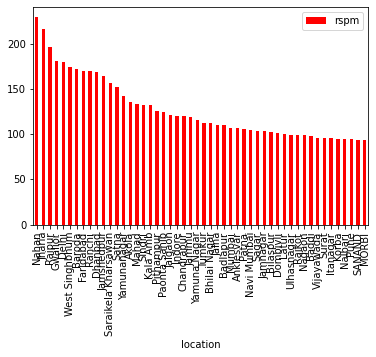

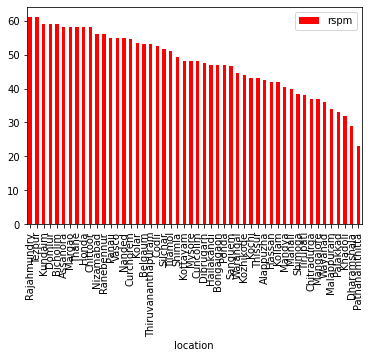

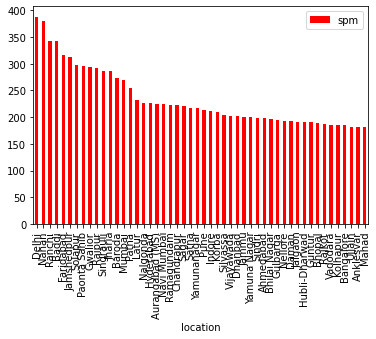

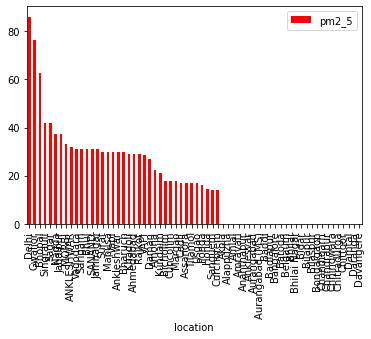

In [ ]:
# bar plot of no2 vs location - desc order - first 50
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).head(50).plot.bar(color = 'g')

# bar plot of no2 vs location - desc order - last 50
df[['no2', 'location']].groupby(['location']).median().sort_values("no2", ascending = False).tail(50).plot.bar(color = 'g')

# bar plot of so2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).head(50).plot.bar(color = 'y')

# bar plot of no2 vs location - desc order
df[['so2', 'location']].groupby(['location']).median().sort_values("so2", ascending = False).tail(50).plot.bar(color = 'y')

# rspm = PM10 - location wise - first 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).head(50).plot.bar(color = 'r')

# rspm = PM10 - location wise - last 50
df[['rspm', 'location']].groupby(['location']).median().sort_values("rspm", ascending = False).tail(50).plot.bar(color = 'r')

# spm = PM10 - location wise - first 50
df[['spm', 'location']].groupby(['location']).median().sort_values("spm", ascending = False).head(50).plot.bar(color = 'r')

# pm2_5 vs location - all non null values
df[['pm2_5', 'location']].groupby(['location']).median().sort_values("pm2_5", ascending = False).head(64).plot.bar(color = 'r')

# Kmeans

In [ ]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('dataset.csv')
df = dataset.copy()

df.head()
df.info()
df.isnull().sum()

replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
df.replace(replacements, regex = True, inplace = True)

df['agency'].value_counts()
# date format - mm/dd/yyyy
df['type'].value_counts()

#deleting all values which have null in type attribute
df = df.dropna(axis = 0, subset = ['type'])
# deleting all values which are null in location attribute
df = df.dropna(axis = 0, subset = ['location'])
#deleting all null values in so2 attribute
df = df.dropna(axis = 0, subset = ['so2'])

df.isnull().sum()

#not interested in agency
del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']

#dataset after deleting the above columns
df.head()

# 298 locations, 34 states


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364236 entries, 0 to 364235
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     243134 non-null  object 
 1   sampling_date                364236 non-null  object 
 2   state                        364236 non-null  object 
 3   location                     364236 non-null  object 
 4   agency                       238756 non-null  object 
 5   type                         359493 non-null  object 
 6   so2                          334160 non-null  float64
 7   no2                          350521 non-null  float64
 8   rspm                         329560 non-null  float64
 9   spm                          162897 non-null  float64
 10  location_monitoring_station  340489 non-null  object 
 11  pm2_5                        8320 non-null    float64
 12  date                         364232 non-null  object 
dtyp

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,02-01-1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,02-01-1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,02-01-1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,03-01-1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,03-01-1990


In [ ]:
#changing type to only 3 categories
a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['type'] = a
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,02-01-1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,02-01-1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,02-01-1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,03-01-1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,03-01-1990
...,...,...,...,...,...,...,...,...,...
364230,Tamil Nadu,Trichy,Residential,13.0,24.0,121.0,NaN,NaN,11-11-2015
364231,Tamil Nadu,Trichy,Residential,13.0,22.0,118.0,NaN,NaN,11/25/2015
364233,Tamil Nadu,Trichy,Residential,14.0,24.0,132.0,NaN,NaN,12/16/2015
364234,Tamil Nadu,Trichy,Residential,15.0,25.0,147.0,NaN,NaN,12/23/2015


In [ ]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['type']= label_encoder.fit_transform(df['type'])
df['type'].unique()

array([2, 0, 1])

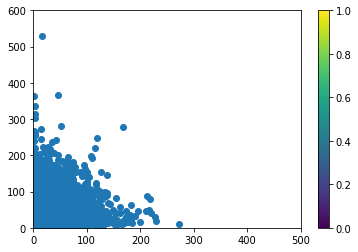

In [ ]:
plt.ylim(0, 600)
plt.xlim(0, 500)
plt.scatter(df['so2'],df['no2'], cmap='viridis')
plt.colorbar()

In [ ]:
df.isnull().values.any()
print(df.isnull().sum())

state            0
location         0
type             0
so2              0
no2           1755
rspm         25368
spm         193772
pm2_5       321506
date             4
dtype: int64


In [ ]:
df = df.dropna(axis = 0, subset = ['no2'])
df.shape
print(df.isnull().sum())

state            0
location         0
type             0
so2              0
no2              0
rspm         25136
spm         193483
pm2_5       319752
date             4
dtype: int64


Elbow Method

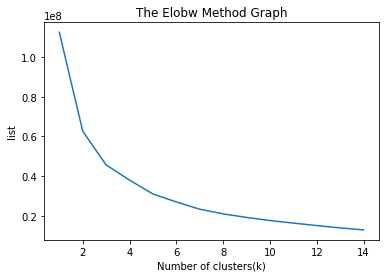

In [ ]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans
k_range=range(1,15)
sse=[]
for k in k_range:
  km=KMeans(n_clusters=k)
  km.fit(df[['no2','so2']])
  sse.append(km.inertia_)
plt.plot(range(1, 15), sse)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('list')  
plt.show()  

In [ ]:
km=KMeans(n_clusters=3)
km

In [ ]:
#no of cluster that should be generated are 3
sse

In [ ]:
#Compute cluster centers and predict cluster index for each sample.
y_pred=km.fit_predict(df[['no2','so2']])
y_pred

In [ ]:
#new column of cluster contain value(0-3) based on group 
df['cluster']=y_pred
df

In [ ]:
#divide into groups(clusters) based on similarity(k=3)
df1=df[df.cluster==0]
df2=df[df.cluster==1]
df3=df[df.cluster==2]

In [ ]:
#visulaizing the clusters  
plt.scatter(df1['no2'],df1['so2'])
plt.scatter(df2['no2'],df2['so2'])
plt.scatter(df3['no2'],df3['so2'])
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',label='centroid') #centroids of each cluster
plt.title('Clusters on pollution level')  
plt.ylim(0, 400)
plt.xlim(0, 400)
plt.legend()  
plt.show()  

In [131]:
#centroids of each cluster
km.cluster_centers_

array([[ 33.24191218,   8.78414968],
       [ 14.32421687,   6.23572597],
       [ 77.64983932,  14.12062826],
       [ 20.84978705,  14.93950818],
       [ 82.52862527,  64.92454883],
       [ 22.86587306,   6.19097378],
       [130.67297696,  18.98207343],
       [ 51.9173759 ,  35.3585966 ],
       [ 27.69602683,  97.7378225 ],
       [  7.60282618,   3.45087558],
       [ 34.71892375,  20.17462741],
       [ 49.51172983,  11.46267333],
       [ 23.99835516,  35.18280942],
       [685.5       ,   7.5       ]])

# Decision Tree

In [138]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('dataset.csv')
df = dataset.copy()

df.head()
df.info()
df.isnull().sum()

replacements = {'state': {r'Uttaranchal': 'Uttarakhand', }}
df.replace(replacements, regex = True, inplace = True)

df['agency'].value_counts()
# date format - mm/dd/yyyy
df['type'].value_counts()

#deleting all values which have null in type attribute
df = df.dropna(axis = 0, subset = ['type'])
# deleting all values which are null in location attribute
df = df.dropna(axis = 0, subset = ['location'])
#deleting all null values in so2 attribute
df = df.dropna(axis = 0, subset = ['so2'])

df.isnull().sum()

#not interested in agency
del df['agency']
del df['location_monitoring_station']
del df['stn_code']
del df['sampling_date']

#dataset after deleting the above columns
df.head()

# 298 locations, 34 states



/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364236 entries, 0 to 364235
Data columns (total 13 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   stn_code                     243134 non-null  object 
 1   sampling_date                364236 non-null  object 
 2   state                        364236 non-null  object 
 3   location                     364236 non-null  object 
 4   agency                       238756 non-null  object 
 5   type                         359493 non-null  object 
 6   so2                          334160 non-null  float64
 7   no2                          350521 non-null  float64
 8   rspm                         329560 non-null  float64
 9   spm                          162897 non-null  float64
 10  location_monitoring_station  340489 non-null  object 
 11  pm2_5                        8320 non-null    float64
 12  date                         364232 non-null  object 
dtyp

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",4.8,17.4,NaN,NaN,NaN,02-01-1990
1,Andhra Pradesh,Hyderabad,Industrial Area,3.1,7.0,NaN,NaN,NaN,02-01-1990
2,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.2,28.5,NaN,NaN,NaN,02-01-1990
3,Andhra Pradesh,Hyderabad,"Residential, Rural and other Areas",6.3,14.7,NaN,NaN,NaN,03-01-1990
4,Andhra Pradesh,Hyderabad,Industrial Area,4.7,7.5,NaN,NaN,NaN,03-01-1990


In [139]:
#changing type to only 3 categories
a = list(df['type'])
for i in range(0, len(df)):
    if str(a[i][0]) == 'R' and a[i][1] == 'e':
        a[i] = 'Residential'
    elif str(a[i][0]) == 'I':
        a[i] = 'Industrial'
    else:
        a[i] = 'Other'
    
df['type'] = a
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,Residential,4.8,17.4,NaN,NaN,NaN,02-01-1990
1,Andhra Pradesh,Hyderabad,Industrial,3.1,7.0,NaN,NaN,NaN,02-01-1990
2,Andhra Pradesh,Hyderabad,Residential,6.2,28.5,NaN,NaN,NaN,02-01-1990
3,Andhra Pradesh,Hyderabad,Residential,6.3,14.7,NaN,NaN,NaN,03-01-1990
4,Andhra Pradesh,Hyderabad,Industrial,4.7,7.5,NaN,NaN,NaN,03-01-1990
...,...,...,...,...,...,...,...,...,...
364230,Tamil Nadu,Trichy,Residential,13.0,24.0,121.0,NaN,NaN,11-11-2015
364231,Tamil Nadu,Trichy,Residential,13.0,22.0,118.0,NaN,NaN,11/25/2015
364233,Tamil Nadu,Trichy,Residential,14.0,24.0,132.0,NaN,NaN,12/16/2015
364234,Tamil Nadu,Trichy,Residential,15.0,25.0,147.0,NaN,NaN,12/23/2015


In [140]:
df.isnull().values.any()
print(df.isnull().sum())

state            0
location         0
type             0
so2              0
no2           1755
rspm         25368
spm         193772
pm2_5       321506
date             4
dtype: int64


In [141]:
df = df.dropna(axis = 0, subset = ['no2'])
df.shape
print(df.isnull().sum())

state            0
location         0
type             0
so2              0
no2              0
rspm         25136
spm         193483
pm2_5       319752
date             4
dtype: int64


In [142]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['type']= label_encoder.fit_transform(df['type'])
df['type'].unique()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


array([2, 0, 1])

In [143]:
df

,state,location,type,so2,no2,rspm,spm,pm2_5,date
0,Andhra Pradesh,Hyderabad,2,4.8,17.4,NaN,NaN,NaN,02-01-1990
1,Andhra Pradesh,Hyderabad,0,3.1,7.0,NaN,NaN,NaN,02-01-1990
2,Andhra Pradesh,Hyderabad,2,6.2,28.5,NaN,NaN,NaN,02-01-1990
3,Andhra Pradesh,Hyderabad,2,6.3,14.7,NaN,NaN,NaN,03-01-1990
4,Andhra Pradesh,Hyderabad,0,4.7,7.5,NaN,NaN,NaN,03-01-1990
...,...,...,...,...,...,...,...,...,...
364230,Tamil Nadu,Trichy,2,13.0,24.0,121.0,NaN,NaN,11-11-2015
364231,Tamil Nadu,Trichy,2,13.0,22.0,118.0,NaN,NaN,11/25/2015
364233,Tamil Nadu,Trichy,2,14.0,24.0,132.0,NaN,NaN,12/16/2015
364234,Tamil Nadu,Trichy,2,15.0,25.0,147.0,NaN,NaN,12/23/2015


In [144]:
features = ['so2','no2']
x=df[features]
y = df['type']
print(x)
print(y) 

         so2   no2
0        4.8  17.4
1        3.1   7.0
2        6.2  28.5
3        6.3  14.7
4        4.7   7.5
...      ...   ...
364230  13.0  24.0
364231  13.0  22.0
364233  14.0  24.0
364234  15.0  25.0
364235  15.0  24.0

[327954 rows x 2 columns]
0         2
1         0
2         2
3         2
4         0
         ..
364230    2
364231    2
364233    2
364234    2
364235    2
Name: type, Length: 327954, dtype: int64


In [145]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

In [146]:
print(x_train)
print(x_test)
print(y_train)
print(y_test)

         so2   no2
208915  12.6  17.7
60106    4.7  16.2
209946  32.8  43.6
157197   2.4  14.5
169375   2.0   4.5
...      ...   ...
47399   17.1  37.9
282103   2.0  12.0
116122   1.0  10.0
236015  16.0  42.0
231134   9.0  11.0

[295158 rows x 2 columns]
         so2   no2
265565   2.0   5.0
316084  15.0  28.0
133618  16.0  42.0
14530    4.0  19.0
354281  10.0  23.0
...      ...   ...
336711  10.0  54.0
114783   6.0  26.0
304941   8.0  27.0
322652   4.5  26.0
104998  10.0  21.0

[32796 rows x 2 columns]
208915    0
60106     2
209946    2
157197    2
169375    0
         ..
47399     2
282103    2
116122    0
236015    2
231134    2
Name: type, Length: 295158, dtype: int64
265565    2
316084    0
133618    2
14530     2
354281    2
         ..
336711    2
114783    0
304941    0
322652    2
104998    2
Name: type, Length: 32796, dtype: int64


In [147]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier(criterion='entropy',min_samples_leaf=4,random_state=0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', min_samples_leaf=4, random_state=0)

In [148]:
y_pred=classifier.predict(x_test)

In [149]:
!pip install tree
from sklearn import tree
from sklearn.tree import export_graphviz
text_representation=tree.export_text(classifier)
print(text_representation)

     |████████████████████████████████| 66 kB 3.0 MB/s 
  Created wheel for tree: filename=Tree-0.2.4-py3-none-any.whl size=7873 sha256=f58f71f78643ac45bd8fc382a06045c4424b0184e80ecff19fcf99f7f80b947e
  Stored in directory: /root/.cache/pip/wheels/64/46/53/3a413f321c09b0df8d4a26edd5fc3501c6c1b238497d166638
Successfully built tree
|--- feature_0 <= 10.01
|   |--- feature_1 <= 16.86
|   |   |--- feature_0 <= 5.28
|   |   |   |--- feature_0 <= 3.96
|   |   |   |   |--- feature_0 <= 1.98
|   |   |   |   |   |--- feature_0 <= 0.65
|   |   |   |   |   |   |--- feature_0 <= 0.48
|   |   |   |   |   |   |   |--- feature_0 <= 0.05
|   |   |   |   |   |   |   |   |--- feature_1 <= 1.85
|   |   |   |   |   |   |   |   |   |--- feature_1 <= 0.10
|   |   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |   |   |--- feature_1 >  0.10
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- feature_1 >  1.85
|   |   |   |   |   |   |   |   | 

In [150]:
decisionTreeScore = classifier.score(x_test, y_test)
print("Accuracy of Decision Tree Classifier is : ", decisionTreeScore)

Accuracy of Decision Tree Classifier is :  0.635107939992682


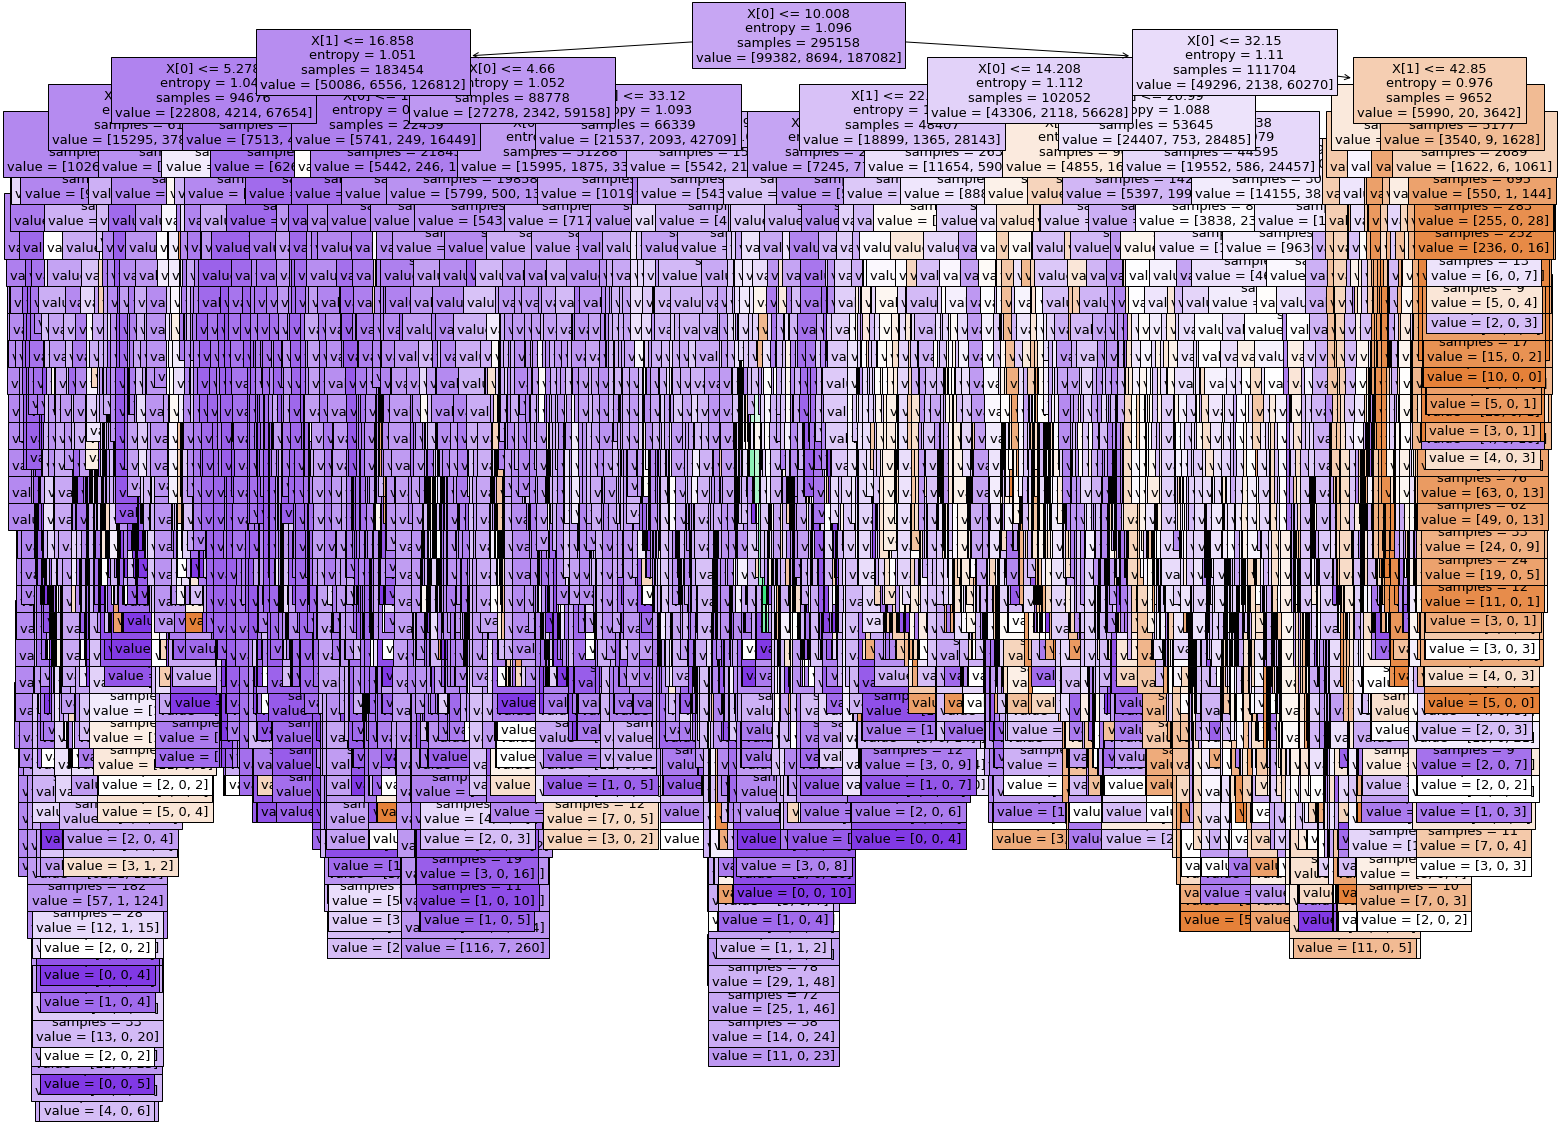

In [154]:
from matplotlib import pyplot as plt
fig=plt.figure(figsize=(25,20))
tree.plot_tree(classifier,fontsize=13,filled=True)
plt.show()
fig.savefig("decision_tree.png")

In [155]:
#Calculate 
from sklearn.metrics import classification_report
print("Report: ", classification_report(y_test, y_pred) )

Report:                precision    recall  f1-score   support

           0       0.49      0.33      0.39     10973
           1       0.30      0.05      0.09       983
           2       0.68      0.83      0.75     20840

    accuracy                           0.64     32796
   macro avg       0.49      0.40      0.41     32796
weighted avg       0.60      0.64      0.61     32796

